# Quiz 7: Data Streams [125 points]

## Author: Hannah Marr

## CS 119

## Setup

Setting up TwelveData API

1. Create your account using your Tufts email ID on twelveData 
2. Login and Save your API Key (You will use your own unique API key in the following exercise). Store this key in a file keys.py your Google Drive with the content twelveDataKey = 'use_your_own_key_blablawhatever'
3. We’ll use a GCP Dataproc Cluster soon, but first we need to exercise the API in a Jupyter notebook. Here is the code:
Verify that the api_key variable contains the key before proceeding. Storing your key in a secure location rather than embedding it in your code is required. An automatic 10% penalty will result if your submitted code includes your key!

In [38]:
# Install necessary libraries
import twelvedata
import matplotlib as mpl
import pandas as pd
import numpy as np

In [83]:
ak = open('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/twelveDataKey.txt', 'r')
api_key = ak.read()

from twelvedata import TDClient
td = TDClient(api_key)

4. [20 points for setting up data collection] We’ll be working with just 3 stocks: AAPL, MSFT and IBM.
5. [25 points for collecting data] Pull the stock data of each stock at 15-minute intervals once for each day, at the end of the day and gather up at least 4 years of stock price data.

In [392]:
# Using TwelveData's API to pull AAPL stock data in a time series format
ts_AAPL_1 = td.time_series(
     symbol="AAPL", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    # This start and end date will not be accurate for this pull, as we will need to determine what start date corresponds with 5000 data points and pull from there
    end_date="2024-10-31", # End date of stock information we are interested in
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_AAPL_1.to_csv('ts_AAPL_1.csv', index=True) # Outputting stock data to a csv file for easier storage

In [394]:
# Viewing tail of DataFrame to determine where next pull will need to begin
ts_AAPL_1.tail(1)

,open,high,low,close,volume
datetime,,,,,
2024-01-26 11:15:00,194.4099,194.565,194.38,194.39,679003


In [396]:
# Structuring next AAPL stock data pull
ts_AAPL_2 = td.time_series(
     symbol="AAPL", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2024-01-26 11:00:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_AAPL_2.to_csv('ts_AAPL_2.csv', index=True) # Outputting stock data to a csv file for easier storage

In [398]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_2.head(1)

,open,high,low,close,volume
datetime,,,,,
2024-01-26 11:00:00,194.52,194.57001,194.37,194.405,1001367


In [400]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_2.tail(1)

,open,high,low,close,volume
datetime,,,,,
2023-04-20 12:45:00,167.435,167.74001,167.42999,167.7,909359


In [402]:
# Structuring next AAPL stock data pull
ts_AAPL_3 = td.time_series(
     symbol="AAPL", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2023-04-20 12:30:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_AAPL_3.to_csv('ts_AAPL_3.csv', index=True) # Outputting stock data to a csv file for easier storage

In [404]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_3.head(1)

,open,high,low,close,volume
datetime,,,,,
2023-04-20 12:30:00,167.41,167.87,167.38,167.4384,1389867


In [406]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_3.tail(1)

,open,high,low,close,volume
datetime,,,,,
2022-07-14 14:00:00,147.55,148.07001,147.49001,147.94,0


In [408]:
# Structuring next AAPL stock data pull
ts_AAPL_4 = td.time_series(
     symbol="AAPL", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2022-07-14 13:45:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_AAPL_4.to_csv('ts_AAPL_4.csv', index=True) # Outputting stock data to a csv file for easier storage

In [410]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_4.head(1)

,open,high,low,close,volume
datetime,,,,,
2022-07-14 13:45:00,147.48,147.62,147.16,147.57001,0


In [412]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_4.tail(1)

,open,high,low,close,volume
datetime,,,,,
2021-10-07 12:00:00,144.13,144.14,143.67999,143.70889,1400069


In [414]:
# Structuring next AAPL stock data pull
ts_AAPL_5 = td.time_series(
     symbol="AAPL", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2021-10-07 11:45:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_AAPL_5.to_csv('ts_AAPL_5.csv', index=True) # Outputting stock data to a csv file for easier storage

In [416]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_5.head(1)

,open,high,low,close,volume
datetime,,,,,
2021-10-07 11:45:00,143.925,144.14999,143.825,144.12,1404692


In [418]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_5.tail(1)

,open,high,low,close,volume
datetime,,,,,
2021-01-04 10:00:00,131.45,131.67,130.38,130.5099,6201896


In [420]:
# Structuring next AAPL stock data pull
ts_AAPL_6 = td.time_series(
     symbol="AAPL", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2021-01-04 09:45:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_AAPL_6.to_csv('ts_AAPL_6.csv', index=True) # Outputting stock data to a csv file for easier storage

In [422]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_6.head(1)

,open,high,low,close,volume
datetime,,,,,
2021-01-04 09:45:00,132.07001,132.3,131.29379,131.4534,5528644


In [424]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_AAPL_6.tail(1)

,open,high,low,close,volume
datetime,,,,,
2020-11-02 09:30:00,109.294,110.67,109.24,110.22,14065522


This is our last data pull, given that in 2024, 10/31 and 11/1 were weekends, and thus will not have stock data.

In [427]:
# Now I will compile the 6 ts_AAPL csv files into one file for ease of viewing

# Read csv files into Jupyter environment
ts_AAPL_1_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_1.csv')
ts_AAPL_2_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_2.csv')
ts_AAPL_3_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_3.csv')
ts_AAPL_4_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_4.csv')
ts_AAPL_5_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_5.csv')
ts_AAPL_6_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_6.csv')

# Append all DataFrames to first DataFrame
ts_AAPL_all = pd.concat([ts_AAPL_1_csv, ts_AAPL_2_csv, ts_AAPL_3_csv, ts_AAPL_4_csv, ts_AAPL_5_csv, ts_AAPL_6_csv], ignore_index=True)

In [429]:
# Write the combined DataFrame back to the csv file
ts_AAPL_all.to_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_all.csv', index=True)

In [431]:
# View head of new compiled DataFrame
ts_AAPL_all.head(10)

,datetime,open,high,low,close,volume
0,2024-10-30 15:45:00,230.57001,230.8400,229.56000,230.14000,4946205
1,2024-10-30 15:30:00,230.73000,230.7950,230.46001,230.55870,1905099
2,2024-10-30 15:15:00,230.67500,230.9400,230.42999,230.73000,796677
3,2024-10-30 15:00:00,230.50000,230.7653,230.17000,230.67999,971761
4,2024-10-30 14:45:00,230.66000,230.8299,230.42999,230.50500,599353
5,2024-10-30 14:30:00,230.62010,230.8900,230.58000,230.66580,595709
6,2024-10-30 14:15:00,230.87500,230.9100,230.50000,230.64999,850069
7,2024-10-30 14:00:00,230.21500,231.0000,230.21111,230.87840,785395
8,2024-10-30 13:45:00,230.13000,230.4400,230.06000,230.21880,741465
9,2024-10-30 13:30:00,230.24500,230.3000,229.87041,230.14000,1190428


In [433]:
# View tail of new compiled DataFrame
ts_AAPL_all.tail(10)

,datetime,open,high,low,close,volume
26062,2020-11-02 11:45:00,108.310,108.3600,107.900,107.9150,2893057
26063,2020-11-02 11:30:00,108.000,108.3200,107.720,108.3099,3494158
26064,2020-11-02 11:15:00,108.370,108.3700,107.770,107.9936,4902027
26065,2020-11-02 11:00:00,108.480,108.6800,108.215,108.3768,4154715
26066,2020-11-02 10:45:00,108.520,109.0200,108.430,108.4900,4519260
26067,2020-11-02 10:30:00,109.800,109.8500,108.430,108.5199,6253909
26068,2020-11-02 10:15:00,109.860,110.2300,109.630,109.8100,4740274
26069,2020-11-02 10:00:00,109.830,110.1600,109.050,109.8500,6438074
26070,2020-11-02 09:45:00,110.230,110.4274,109.629,109.8200,6184742
26071,2020-11-02 09:30:00,109.294,110.6700,109.240,110.2200,14065522


In [441]:
# Including ts_AAPL_all csv file here
ts_AAPL_all_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_AAPL_all.csv')

In [500]:
# Add a new column 'Symbol' and fill it with 'AAPL' for all rows
ts_AAPL_all['Symbol'] = 'AAPL'

# Display the updated DataFrame
ts_AAPL_all.head()

,datetime,open,high,low,close,volume,Symbol
0,2024-10-30 15:45:00,230.57001,230.8400,229.56000,230.14000,4946205,AAPL
1,2024-10-30 15:30:00,230.73000,230.7950,230.46001,230.55870,1905099,AAPL
2,2024-10-30 15:15:00,230.67500,230.9400,230.42999,230.73000,796677,AAPL
3,2024-10-30 15:00:00,230.50000,230.7653,230.17000,230.67999,971761,AAPL
4,2024-10-30 14:45:00,230.66000,230.8299,230.42999,230.50500,599353,AAPL


---

In [282]:
# Using TwelveData's API to pull MSFT stock data in a time series format
# Given the issues I ran into pulling data from 2019 from AAPL stocks, I will begin my pulls in 2024 for MSFT
ts_MSFT_1 = td.time_series(
     symbol="MSFT", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2024-10-31", # End date of stock information we are interested in, which I will adjust
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_MSFT_1.to_csv('ts_MSFT_1.csv', index=True) # Outputting stock data to a csv file for easier storage

In [286]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_1.head(1)

,open,high,low,close,volume
datetime,,,,,
2024-10-30 15:45:00,434.47,434.92999,432.23001,433.63,2994478


In [290]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_1.tail(1)

,open,high,low,close,volume
datetime,,,,,
2024-01-26 11:15:00,405.14999,405.56,405.12,405.345,378092


In [297]:
# Structuring next MSFT stock data pull
ts_MSFT_2 = td.time_series(
     symbol="MSFT", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2024-01-26 11:00:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_MSFT_2.to_csv('ts_MSFT_2.csv', index=True) # Outputting stock data to a csv file for easier storage

In [299]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_2.head(1)

,open,high,low,close,volume
datetime,,,,,
2024-01-26 11:00:00,405.116,405.64001,405.07999,405.14999,362539


In [301]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_2.tail(1)

,open,high,low,close,volume
datetime,,,,,
2023-04-20 12:45:00,287.91,288.42709,287.91,288.41431,444660


In [303]:
# Structuring next MSFT stock data pull
ts_MSFT_3 = td.time_series(
     symbol="MSFT", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2023-04-20 12:30:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_MSFT_3.to_csv('ts_MSFT_3.csv', index=True) # Outputting stock data to a csv file for easier storage

In [305]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_3.head(1)

,open,high,low,close,volume
datetime,,,,,
2023-04-20 12:30:00,287.745,288.1774,287.57999,287.89001,496837


In [307]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_3.tail(1)

,open,high,low,close,volume
datetime,,,,,
2022-07-14 14:15:00,253.11,254.45,252.99001,254.36,0


In [309]:
# Structuring next MSFT stock data pull
ts_MSFT_4 = td.time_series(
     symbol="MSFT", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2022-07-14 14:00:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_MSFT_4.to_csv('ts_MSFT_4.csv', index=True) # Outputting stock data to a csv file for easier storage

In [311]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_4.head(1)

,open,high,low,close,volume
datetime,,,,,
2022-07-14 14:00:00,252.82001,253.24001,252.73,253.12,0


In [313]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_4.tail(1)

,open,high,low,close,volume
datetime,,,,,
2021-10-07 12:15:00,295.95499,296.01001,295.76001,295.85999,371869


In [315]:
# Structuring next MSFT stock data pull
ts_MSFT_5 = td.time_series(
     symbol="MSFT", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2021-10-07 12:00:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_MSFT_5.to_csv('ts_MSFT_5.csv', index=True) # Outputting stock data to a csv file for easier storage

In [317]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_5.head(1)

,open,high,low,close,volume
datetime,,,,,
2021-10-07 12:00:00,296.37,296.435,295.87061,295.97,381867


In [319]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_5.tail(1)

,open,high,low,close,volume
datetime,,,,,
2020-12-31 15:45:00,221.45,223.0,221.37489,222.24001,2930529


In [321]:
# Structuring next MSFT stock data pull
ts_MSFT_6 = td.time_series(
     symbol="MSFT", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2020-12-31 15:30:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_MSFT_6.to_csv('ts_MSFT_6.csv', index=True) # Outputting stock data to a csv file for easier storage

In [323]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_6.head(1)

,open,high,low,close,volume
datetime,,,,,
2020-12-31 15:30:00,221.38,221.53,221.1601,221.45,692707


In [325]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_MSFT_6.tail(1)

,open,high,low,close,volume
datetime,,,,,
2020-11-02 09:30:00,204.2735,205.27,203.61,204.71001,2686431


Since 10/31 was a Saturday in 2020, this constitutes 4 years worth of data

In [328]:
# Now I will compile the 6 ts_MSFT csv files into one file for ease of viewing

# Read csv files into Jupyter environment
ts_MSFT_1_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_1.csv')
ts_MSFT_2_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_2.csv')
ts_MSFT_3_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_3.csv')
ts_MSFT_4_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_4.csv')
ts_MSFT_5_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_5.csv')
ts_MSFT_6_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_6.csv')

# Append all DataFrames to first DataFrame
ts_MSFT_all = pd.concat([ts_MSFT_1_csv, ts_MSFT_2_csv, ts_MSFT_3_csv, ts_MSFT_4_csv, ts_MSFT_5_csv, ts_MSFT_6_csv], ignore_index=True)

In [330]:
# View the head of the compiled DataFrame
ts_MSFT_all.head(10)

,datetime,open,high,low,close,volume
0,2024-10-30 15:45:00,434.47000,434.92999,432.23001,433.63000,2994478
1,2024-10-30 15:30:00,434.92499,435.37000,434.44000,434.47000,844810
2,2024-10-30 15:15:00,434.82001,434.92001,434.32999,434.92001,633750
3,2024-10-30 15:00:00,434.62000,434.97000,434.25000,434.81500,608346
4,2024-10-30 14:45:00,435.06500,435.28989,434.57501,434.64999,417566
5,2024-10-30 14:30:00,434.54001,435.35989,434.50009,435.06000,385798
6,2024-10-30 14:15:00,434.56500,434.92001,434.09000,434.53000,407862
7,2024-10-30 14:00:00,434.35999,435.03989,434.29999,434.57999,459676
8,2024-10-30 13:45:00,435.17499,435.88000,434.23599,434.27499,593179
9,2024-10-30 13:30:00,437.39999,437.45001,434.81641,435.16919,884341


In [332]:
# View tail of the compiled DataFrame
ts_MSFT_all.tail(10)

,datetime,open,high,low,close,volume
26059,2020-11-02 11:45:00,202.37000,202.64999,201.85001,201.85001,719646
26060,2020-11-02 11:30:00,202.33000,202.42999,201.75000,202.38499,863742
26061,2020-11-02 11:15:00,202.50000,202.64000,201.91000,202.31000,915684
26062,2020-11-02 11:00:00,203.07001,203.30000,202.09000,202.50000,913278
26063,2020-11-02 10:45:00,202.89850,203.45500,202.85001,203.07001,1005058
26064,2020-11-02 10:30:00,204.11180,204.22000,202.82001,202.88370,1115503
26065,2020-11-02 10:15:00,204.34000,204.77991,203.81000,204.14999,1177258
26066,2020-11-02 10:00:00,204.39000,204.89000,203.50000,204.28999,1385543
26067,2020-11-02 09:45:00,204.72000,205.00999,203.86000,204.39000,1339144
26068,2020-11-02 09:30:00,204.27350,205.27000,203.61000,204.71001,2686431


In [334]:
# Write the combined DataFrame back to the csv file
ts_MSFT_all.to_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_all.csv', index=True)

In [443]:
# Including ts_MSFT_all csv file here
ts_MSFT_all_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_MSFT_all.csv')

In [502]:
# Add a new column 'Symbol' and fill it with 'MSFT' for all rows
ts_MSFT_all['Symbol'] = 'MSFT'

# Display the updated DataFrame
ts_MSFT_all.head()

,datetime,open,high,low,close,volume,Symbol
0,2024-10-30 15:45:00,434.47000,434.92999,432.23001,433.63000,2994478,MSFT
1,2024-10-30 15:30:00,434.92499,435.37000,434.44000,434.47000,844810,MSFT
2,2024-10-30 15:15:00,434.82001,434.92001,434.32999,434.92001,633750,MSFT
3,2024-10-30 15:00:00,434.62000,434.97000,434.25000,434.81500,608346,MSFT
4,2024-10-30 14:45:00,435.06500,435.28989,434.57501,434.64999,417566,MSFT


---

In [336]:
# Using TwelveData's API to pull IBM stock data in a time series format
ts_IBM_1 = td.time_series(
     symbol="IBM", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2024-10-31", # End date of stock information we are interested in, which I will adjust
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_IBM_1.to_csv('ts_IBM_1.csv', index=True) # Outputting stock data to a csv file for easier storage

In [340]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_1.head(1)

,open,high,low,close,volume
datetime,,,,,
2024-10-30 15:45:00,204.62,205.11,204.545,205.0,786785


In [346]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_1.tail(1)

,open,high,low,close,volume
datetime,,,,,
2024-01-26 11:15:00,187.955,187.96989,187.63,187.88499,198324


In [348]:
# Structuring next IBM stock data pull
ts_IBM_2 = td.time_series(
     symbol="IBM", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2024-01-26 11:00:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_IBM_2.to_csv('ts_IBM_2.csv', index=True) # Outputting stock data to a csv file for easier storage

In [350]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_2.head(1)

,open,high,low,close,volume
datetime,,,,,
2024-01-26 11:00:00,188.32001,188.32001,187.77,187.935,298018


In [352]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_2.tail(1)

,open,high,low,close,volume
datetime,,,,,
2023-04-20 12:45:00,127.14,127.3,127.01,127.035,157979


In [354]:
# Structuring next IBM stock data pull
ts_IBM_3 = td.time_series(
     symbol="IBM", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2023-04-20 12:30:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_IBM_3.to_csv('ts_IBM_3.csv', index=True) # Outputting stock data to a csv file for easier storage

In [358]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_3.head(1)

,open,high,low,close,volume
datetime,,,,,
2023-04-20 12:30:00,127.15,127.44,127.06,127.17,190662


In [360]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_3.tail(1)

,open,high,low,close,volume
datetime,,,,,
2022-07-14 14:15:00,138.62,139.14999,138.59,139.14,0


In [362]:
# Structuring next IBM stock data pull
ts_IBM_4 = td.time_series(
     symbol="IBM", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2022-07-14 14:00:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_IBM_4.to_csv('ts_IBM_4.csv', index=True) # Outputting stock data to a csv file for easier storage

In [366]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_4.head(1)

,open,high,low,close,volume
datetime,,,,,
2022-07-14 14:00:00,138.41,138.81,138.41,138.62,0


In [368]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_4.tail(1)

,open,high,low,close,volume
datetime,,,,,
2021-10-06 12:45:00,135.11367,135.17017,134.93308,134.9761,98622


In [370]:
# Structuring next IBM stock data pull
ts_IBM_5 = td.time_series(
     symbol="IBM", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2021-10-06 12:30:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_IBM_5.to_csv('ts_IBM_5.csv', index=True) # Outputting stock data to a csv file for easier storage

In [372]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_5.head(1)

,open,high,low,close,volume
datetime,,,,,
2021-10-06 12:30:00,134.85659,135.17208,134.70363,135.11951,131531


In [374]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_5.tail(1)

,open,high,low,close,volume
datetime,,,,,
2020-12-31 10:45:00,118.9675,118.98088,118.74761,118.92447,86821


In [376]:
# Structuring next IBM stock data pull
ts_IBM_6 = td.time_series(
     symbol="IBM", # Specifying which stock we are pulling data from
     interval="15min", # The interval at which we will sample
     start_date="2020-10-31", # Start date of stock information we are interested in
    end_date="2020-12-31 10:30:00", # End date of stock information we are interested in, adjusted based on previous pull
    outputsize = 5000 # TwelveData only allows for 5000 data points to be pulled at once, so we will have to compile data pulls across 4 years worth of data
).as_pandas()

ts_IBM_6.to_csv('ts_IBM_6.csv', index=True) # Outputting stock data to a csv file for easier storage

In [378]:
# Viewing head of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_6.head(1)

,open,high,low,close,volume
datetime,,,,,
2020-12-31 10:30:00,118.92926,119.17792,118.90058,118.95316,78204


In [380]:
# Viewing tail of DataFrame to evaluate success of this pull and determine end date structure of next pull
ts_IBM_6.tail(1)

,open,high,low,close,volume
datetime,,,,,
2020-11-02 09:30:00,107.86807,108.56596,107.33547,107.46176,549494


Since 10/31 was a Saturday in 2020, this constitutes 4 years worth of data

In [384]:
# Now I will compile the 6 ts_IBM csv files into one file for ease of viewing

# Read csv files into Jupyter environment
ts_IBM_1_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_1.csv')
ts_IBM_2_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_2.csv')
ts_IBM_3_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_3.csv')
ts_IBM_4_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_4.csv')
ts_IBM_5_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_5.csv')
ts_IBM_6_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_6.csv')

# Append all DataFrames to first DataFrame
ts_IBM_all = pd.concat([ts_IBM_1_csv, ts_IBM_2_csv, ts_IBM_3_csv, ts_IBM_4_csv, ts_IBM_5_csv, ts_IBM_6_csv], ignore_index=True)

In [386]:
# View the head of the compiled DataFrame
ts_IBM_all.head(10)

,datetime,open,high,low,close,volume
0,2024-10-30 15:45:00,204.62000,205.11000,204.54500,205.00000,786785
1,2024-10-30 15:30:00,204.67999,204.82990,204.50999,204.59081,234874
2,2024-10-30 15:15:00,205.14000,205.14999,204.69000,204.69501,140789
3,2024-10-30 15:00:00,205.13000,205.28120,204.83000,205.16499,144423
4,2024-10-30 14:45:00,204.52000,205.14000,204.42000,205.14000,107504
5,2024-10-30 14:30:00,204.50000,204.64000,204.25999,204.48000,379847
6,2024-10-30 14:15:00,204.91499,204.94000,204.44000,204.52000,228487
7,2024-10-30 14:00:00,204.96001,205.09500,204.74001,204.92000,298840
8,2024-10-30 13:45:00,205.41000,205.53999,204.89999,204.96831,210795
9,2024-10-30 13:30:00,205.81000,205.89000,205.30000,205.42500,201234


In [388]:
# View the tail of the compiled DataFrame
ts_IBM_all.tail(10)

,datetime,open,high,low,close,volume
26039,2020-11-02 11:45:00,108.60421,108.63288,108.43691,108.43691,87939
26040,2020-11-02 11:30:00,108.35564,108.64245,108.13576,108.56596,125380
26041,2020-11-02 11:15:00,108.22179,108.34608,107.96845,108.34608,120562
26042,2020-11-02 11:00:00,107.98757,108.56596,107.98757,108.24092,270263
26043,2020-11-02 10:45:00,107.96367,108.08317,107.60736,107.95191,226654
26044,2020-11-02 10:30:00,108.36941,108.36941,107.84990,108.00191,204824
26045,2020-11-02 10:15:00,108.15487,108.71893,107.84895,108.42257,233304
26046,2020-11-02 10:00:00,108.36520,108.82075,108.07361,108.10860,263536
26047,2020-11-02 09:45:00,107.46176,108.25009,107.33269,108.22275,197755
26048,2020-11-02 09:30:00,107.86807,108.56596,107.33547,107.46176,549494


In [390]:
# Write the combined DataFrame back to the csv file
ts_IBM_all.to_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_all.csv', index=True)

In [445]:
# Including ts_IBM_all csv file here
ts_IBM_all_csv = pd.read_csv('/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/ts_IBM_all.csv')

In [504]:
# Add a new column 'Symbol' and fill it with 'IBM' for all rows
ts_IBM_all['Symbol'] = 'IBM'

# Display the updated DataFrame
ts_IBM_all.head()

,datetime,open,high,low,close,volume,Symbol
0,2024-10-30 15:45:00,204.62000,205.11000,204.54500,205.00000,786785,IBM
1,2024-10-30 15:30:00,204.67999,204.82990,204.50999,204.59081,234874,IBM
2,2024-10-30 15:15:00,205.14000,205.14999,204.69000,204.69501,140789,IBM
3,2024-10-30 15:00:00,205.13000,205.28120,204.83000,205.16499,144423,IBM
4,2024-10-30 14:45:00,204.52000,205.14000,204.42000,205.14000,107504,IBM


---

In [506]:
# Create a compiled DataFrame of all stock data to apply hash function to
saved_df = pd.concat([ts_AAPL_all, ts_MSFT_all, ts_IBM_all], ignore_index = True)

saved_df.head()

,datetime,open,high,low,close,volume,Symbol
0,2024-10-30 15:45:00,230.57001,230.8400,229.56000,230.14000,4946205,AAPL
1,2024-10-30 15:30:00,230.73000,230.7950,230.46001,230.55870,1905099,AAPL
2,2024-10-30 15:15:00,230.67500,230.9400,230.42999,230.73000,796677,AAPL
3,2024-10-30 15:00:00,230.50000,230.7653,230.17000,230.67999,971761,AAPL
4,2024-10-30 14:45:00,230.66000,230.8299,230.42999,230.50500,599353,AAPL


In [508]:
saved_df.tail()

,datetime,open,high,low,close,volume,Symbol
78185,2020-11-02 10:30:00,108.36941,108.36941,107.84990,108.00191,204824,IBM
78186,2020-11-02 10:15:00,108.15487,108.71893,107.84895,108.42257,233304,IBM
78187,2020-11-02 10:00:00,108.36520,108.82075,108.07361,108.10860,263536,IBM
78188,2020-11-02 09:45:00,107.46176,108.25009,107.33269,108.22275,197755,IBM
78189,2020-11-02 09:30:00,107.86807,108.56596,107.33547,107.46176,549494,IBM


In [510]:
# Applying the slightly edited hash function to my saved_df with dates (inclusive) from 2020-10-31 to 2024-10-31
def df_hexdigest(saved_df):
    '''
        saved_df should be a dataframe with columns ['datetime', 'open', 'high', 'low', 'close', 'volume', 'Symbol']
        and with all data points between 2020-10-31 and 2024-10-31 (both dates inclusive), for  AAPL, MSFT and IBM.
    '''

    # Convert 'datetime' column to datetime objects if it's not already
    import pandas as pd

    saved_df['datetime'] = pd.to_datetime(saved_df['datetime'])

    # Sort the DataFrame by the 'datetime' column
    saved_df = saved_df.sort_values('datetime')

    # Display the sorted DataFrame (optional)
    # print(saved_df)
    saved_df = saved_df.reset_index(drop=True)
    saved_df

    df_filtered = saved_df[(saved_df['datetime'] >= '2020-10-31') & (saved_df['datetime'] <= '2024-10-31')]
    df_filtered

    # Sort the DataFrame by the 'datetime' column
    df_filtered_sorted = df_filtered.sort_values('datetime')

    df_filtered_sorted = df_filtered_sorted.reset_index(drop=True)
    df_filtered_sorted.head()

    df_filtered_sorted_deduped = df_filtered_sorted.drop_duplicates(subset=['datetime', 'open', 'high', 'low', 'close', 'volume', 'Symbol'], keep='first')

    printed_string = df_filtered_sorted_deduped[['datetime', 'Symbol']].to_string(index=False, header=False)
    # print(printed_string[:2000])
    import hashlib
    md5_hash = hashlib.md5(printed_string.encode()) # Use hashlib.md5() to create the hash object
    return md5_hash.hexdigest()

In [512]:
df_hexdigest(saved_df)

'970195eebfbc0ef6bb171f88b963e403'

---

## Algorithmic Stock Trading

Automated trading relies on good quality data feeds and their timely delivery is what accounts for the cost. Watch @How algorithms shape our world | Kevin Slavin and answer the following questions:

7. [12 points] If you had to buy 1,000,000 shares of a stock without letting the market know, list some strategies you might use. Be as specific as possible: “I would break up the order into manageable chunks” wouldn’t get you much credit. Search, research, and then answer.

Below, I will outline several specific approaches for executing 1,000,000 shares without alerting the market.

Time-Weighted Average Price (TWAP) Strategy:

TWAP distributes the total order evenly over a specified time period, executing trades at regular intervals regardless of volume. To implement this strategy, my code would divide the 1,000,000 shares by the number of intervals (e.g., hours or minutes) within the desired execution window. My code would then place the orders for these smaller quantities at each interval. The advantage of this strategy is it reduces the likelihood of significant market impact by avoiding large, sudden trades. However, this strategy may not adapt to real-time market conditions, which could cause it to potentially miss opportunities during favorable price movements.

Reference: https://www.quantifiedstrategies.com/twap-time-weighted-average-price-order/

Volume-Weighted Average Price (VWAP) Strategy:

VWAP executes orders in proportion to the trading volume of the stock, aiming to match or improve upon the average price weighted by volume over the execution period. To implement this strategy, my code would monitor real-time trading volumes and adjust order sizes accordingly, placing larger orders during periods of high volume and smaller ones during low volume. The advantage of this strategy is that it aligns with natural market liquidity, thus reducing the risk of price disruption. However, this strategy requires continuous monitoring of trading volumes and may be less effective in illiquid markets.

Reference: https://www.binance.com/en/blog/otc/what-are-algorithmic-orders-twap-and-pov-strategies-explained-572102887905225345

Percentage of Volume (POV) Strategy:

POV executes orders as a fixed percentage of the total market volume, maintaining a consistent participation rate. To implement this strategy, my code would determine a target participation rate (e.g., 10% of market volume) and adjust order sizes dynamically to maintain this rate throughout the trading session. An advantage of this strategy is that it minimizes market impact by scaling orders with market activity. A consideration is that execution speed is tied to market volume; thus, in low-volume periods, the strategy may not complete the full order within the desired timeframe.

Reference: https://www.binance.com/en/blog/otc/what-are-algorithmic-orders-twap-and-pov-strategies-explained-572102887905225345

Implementation Shortfall (IS) Strategy:

IS balances the trade-off between execution cost and market risk by adjusting the execution pace based on market conditions and price movements. To implement this strategy, my code would monitor real-time price movements and volatility, and accelerate execution when prices are favorable and decelerate when prices are less favorable, aiming to minimize the difference between the decision price and the final execution price. An advantage of this strategy is that it optimizes execution cost by being responsive to market conditions. This strategy requires sophisticated algorithms and real-time data analysis to implement effectively.

Reference: https://www.investopedia.com/articles/active-trading/101014/basics-algorithmic-trading-concepts-and-examples.asp

Iceberg Orders:

In the Iceberg Orders strategy, large orders are divided into smaller visible portions (the "tip" of the iceberg) while keeping the majority of the order hidden. To implement this strategy, my code would place a small portion of the total order in the order book. Once this portion is executed, it would be automatically replenished with another small portion until the entire order is filled. An advantage of this strategy is that it conceals the true size of the order, reducing the likelihood of adverse market reactions. However, it may result in slower execution if the visible portion is too small relative to market liquidity.

Reference: https://www.daytrading.com/order-execution-strategies

Adaptive Execution Strategies Using Machine Learning:

This strategy would employ machine learning models to predict short-term price movements and adjust execution strategies dynamically. To implement this strategy, my code would train models on historical and real-time data to forecast price trends and volatility. The code would then use these predictions to determine optimal order sizes and timing. The advantage of this approach is that it enhances execution efficiency by adapting to evolving market conditions. However, this strategy would require advanced technical expertise and robust computational resources.

Reference: https://arxiv.org/abs/2301.09705

8. [12 points] If you had to figure out if someone was “dumping” a large quantity of stocks, how would you do it? What parameters, over what period of time?

Below, I will outline several strategies and parameters for detecting the discreet sale of a large quantity of stocks ("dumping").

Unusual Volume Spikes:

One strategy is to monitor for significant increases in trading volume that deviate from the stock's average volume. The parameters I would use would compare the current trading volume against the stock's average volume over the past 30 to 90 days. I would evaluate these parameters over daily and intraday intervals. To implement this strategy, my code would calculate the average trading volume over the selected period and flag instances where the current volume exceeds this average by a substantial margin (e.g., 150% or more).

Reference: https://www.investopedia.com/articles/active-trading/091514/essential-strategies-trading-volume.asp?utm_source=chatgpt.com

Price Declines Accompanied by High Volume:

Another strategy is to identify periods where the stock's price decreases significantly alongside elevated trading volumes, which would indicate potential large-scale selling. The parameters I would use would track percentage price changes and corresponding volume levels, and evaluate these over daily and intraday intervals. To implement this strategy, my code would set thresholds for price decline (e.g., a drop of 2% or more) and volume increase (e.g., 150% above average) occurring simultaneously.

Reference: https://www.investopedia.com/articles/active-trading/091514/essential-strategies-trading-volume.asp?utm_source=chatgpt.com

Order Book Imbalances:

Another strategy would be to examine the order book for a disproportionate number of sell orders compared to buy orders, indicating selling pressure. The parameters I would use would assess the ratio of sell to buy orders at various price levels, and evaluate these via real-time monitoring during trading hours. To implement this strategy, my code would analyze the depth of market data to identify significant sell-side imbalances.

Reference: https://en.wikipedia.org/wiki/Order_flow_trading

Block Trade Analysis:

Block Trade Analysis seeks to detect large, privately negotiated trades reported to the exchange, which may indicate substantial selling activities. The parameters I would use would monitor for trades exceeding a certain share count or dollar amount (e.g., 10,000 shares or $500,000). My could would implement a daily review of reported block trades. To implement this strategy, I would utilize financial news services or exchange reports to track block trades and analyze their potential impact on the stock.

Reference: https://www.benzinga.com/pro/blog/understanding-block-trades-and-how-to-find-them

Short Interest and Borrowing Costs:

This strategy relies on the reasoning that an increase in short interest or the cost to borrow shares may suggest that market participants are anticipating or reacting to large-scale selling. The parameters I would use would monitor changes in short interest as a percentage of float and borrowing rates. These would be monitored bi-weekly for short interest reports and daily for borrowing costs. To implement this strategy, my code would analyze short interest data released by exchanges and track borowing costs through brokerage platforms.

References:
https://www.investopedia.com/terms/s/shortinterest.asp ; https://www.interactivebrokers.com/en/pricing/short-sale-cost.php

Insider Trading Disclosures:

I could review filings for significant sales by company insiders, which could indicate large-scale selling. The parameters I set would monitor Form 4 filings submitted to the SEC. My code would access the SEC EDGAR database to track insider transactions, and implement a weekly review of filings.

References: https://www.investopedia.com/terms/f/form4.asp ; https://www.investopedia.com/terms/i/insidertrading.asp

News and Public Disclosures:

I could stay informed about news releases, earnings reports, or analyst downgrades that might prompt large shareholders to sell. This would involve daily monitoring of news outlets and press releases related to the company. I could write code that would set up alerts for news related to companies of interest and analyze the potential impact on stock price and volume.

References: https://www.investopedia.com/ask/answers/155.asp#:~:text=Good%20News%2FBad%20News,many%20if%20not%20most%20stocks. ; https://www.wsj.com/market-data

---

## Technical Analysis of Stock Trading

For each case, submit your spark code and the buy/sell recommendations for each stock. [Actual trades have to specify the number of shares. Assume that each time you need to buy/sell, you are trading 1000 shares of Apple.] 

9. The program at https://github.com/singhj/big-data-repo/blob/main/spark-examples/stock-price-feeder.py was designed to feed stock prices of Microsoft and Google. However, it relies on an almost-obsolete API (finance-datareader). 
10. [16 points] Create a similar program new-stock-price-feeder.py that uses a more modern API (e.g., twelveData) instead.

The line new-stock-price-feeder.py | nc -lk 9999 can then be run used for feeding price data into spark.

11. [8 pts] Set up the stream to feed data into pyspark streams aaplPrice and msftPrice. 

12. [8 pts] From aaplPrice produce two other streams aapl10Day, aapl40Day

13. [8 pts] From msftPrice produce two more streams msft10Day and msft40Day 

14. [16 pts]. Compare the two moving averages (10-day MA and the 40-day MA) to indicate buy and sell signals . Your output should be of the form [( <date> buy <symbol>), ( <date> sell <symbol>), etc].

In [ ]:
# My new stock price feeder, read into HDFS as new-stock-price-feeder5.py

#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import time
import datetime
import sys
import requests
from tqdm import tqdm
import subprocess

# Set up TwelveData API by reading the API key from HDFS
try:
    result = subprocess.run(
        ['hadoop', 'fs', '-cat', '/user/hmarr24/twelveDataKey.txt'],  # Verify this path is correct
        stdout=subprocess.PIPE,
        text=True
    )
    API_KEY = result.stdout.strip()
    if API_KEY:
        print("API_KEY loaded successfully.")
    else:
        raise ValueError("API_KEY is empty.")
except Exception as e:
    print("Error loading API_KEY:", e)
    sys.exit(1)  # Exit if API key is not available

BASE_URL = "https://api.twelvedata.com/"

# Define function to retrieve historical data with added logging
def get_historical_data(symbol, start_date, end_date, interval="1day"):
    print(f"Fetching historical data for {symbol} from {start_date} to {end_date}...", file=sys.stderr)
    params = {
        "symbol": symbol,
        "interval": interval,
        "start_date": start_date,
        "end_date": end_date,
        "apikey": API_KEY,
    }
    response = requests.get(BASE_URL + "time_series", params=params)
    if response.status_code != 200:
        print(f"Error: Status code {response.status_code} when fetching historical data for {symbol}", file=sys.stderr)
        return pd.Series()  # Return empty Series on failure
    data = response.json()
    if 'values' in data:
        df = pd.DataFrame(data['values'])
        df['datetime'] = pd.to_datetime(df['datetime'])
        df.set_index('datetime', inplace=True)
        df = df.astype(float)
        print(f"Successfully retrieved historical data for {symbol}.", file=sys.stderr)
        return df['close']
    else:
        print("Error fetching data:", data.get("message", "Unknown error"), file=sys.stderr)
        return pd.Series()

# Fetch historical data for AAPL and MSFT
start_date = "2020-01-01"
end_date = "2020-12-31"
print("Starting historical data retrieval...", file=sys.stderr)
aapl = get_historical_data("AAPL", start_date, end_date)
print("AAPL historical data retrieved.", file=sys.stderr)
msft = get_historical_data("MSFT", start_date, end_date)
print("MSFT historical data retrieved.", file=sys.stderr)

# Scale MSFT data to match AAPL on the initial date
scaler = aapl.iloc[0] / msft.iloc[0]
scaled_msft = msft * scaler

# Combine data into a DataFrame
tech_df = pd.DataFrame({"AAPL": aapl, "scaledMSFT": scaled_msft})
dates = tech_df.index
init_date = dates[0]
last_hist_date = dates[-1]

# Set up initial parameters
init_delay_seconds = 5  # Reduced for quicker testing
interval = 5

print(f'Sending daily AAPL and MSFT prices from {init_date.date()} to {last_hist_date.date()} ...', file=sys.stderr)
print(f"... each day's data sent every {interval} seconds ...", file=sys.stderr)
print(f"... beginning in {init_delay_seconds} seconds ...", file=sys.stderr)
print(f"... MSFT prices adjusted to match AAPL prices on {init_date.date()} ...", file=sys.stderr)

# Initial delay countdown
for left in tqdm(range(init_delay_seconds)):
    time.sleep(0.5)

# Simulate sending historical prices
for date in dates:
    print(f"{date.date()}\t{tech_df['AAPL'][date]:.4f}\t{tech_df['scaledMSFT'][date]:.4f}")
    time.sleep(interval)

# Define function to retrieve real-time price with added logging
def get_real_time_price(symbol):
    print(f"Fetching real-time price for {symbol}...", file=sys.stderr)
    params = {
        "symbol": symbol,
        "apikey": API_KEY,
    }
    response = requests.get(BASE_URL + "price", params=params)
    if response.status_code != 200:
        print(f"Error: Status code {response.status_code} when fetching real-time price for {symbol}", file=sys.stderr)
        return 0.0  # Return 0.0 on failure
    data = response.json()
    price = float(data.get("price", 0.0))
    print(f"Real-time price for {symbol}: {price}", file=sys.stderr)
    return price

# Retrieve live prices for 10 iterations (commented out for testing)
#print("Fetching real-time prices for AAPL and MSFT...")

for t in range(10):
    now = datetime.datetime.now()
    aapl_price = get_real_time_price("AAPL")
    msft_price = get_real_time_price("MSFT")
    print(f"{now.strftime('%Y-%m-%d %H:%M:%S')}\t{aapl_price:.4f}\t{msft_price:.4f}")
    time.sleep(5.0)

exit(0)

I verified that this script runs correctly:
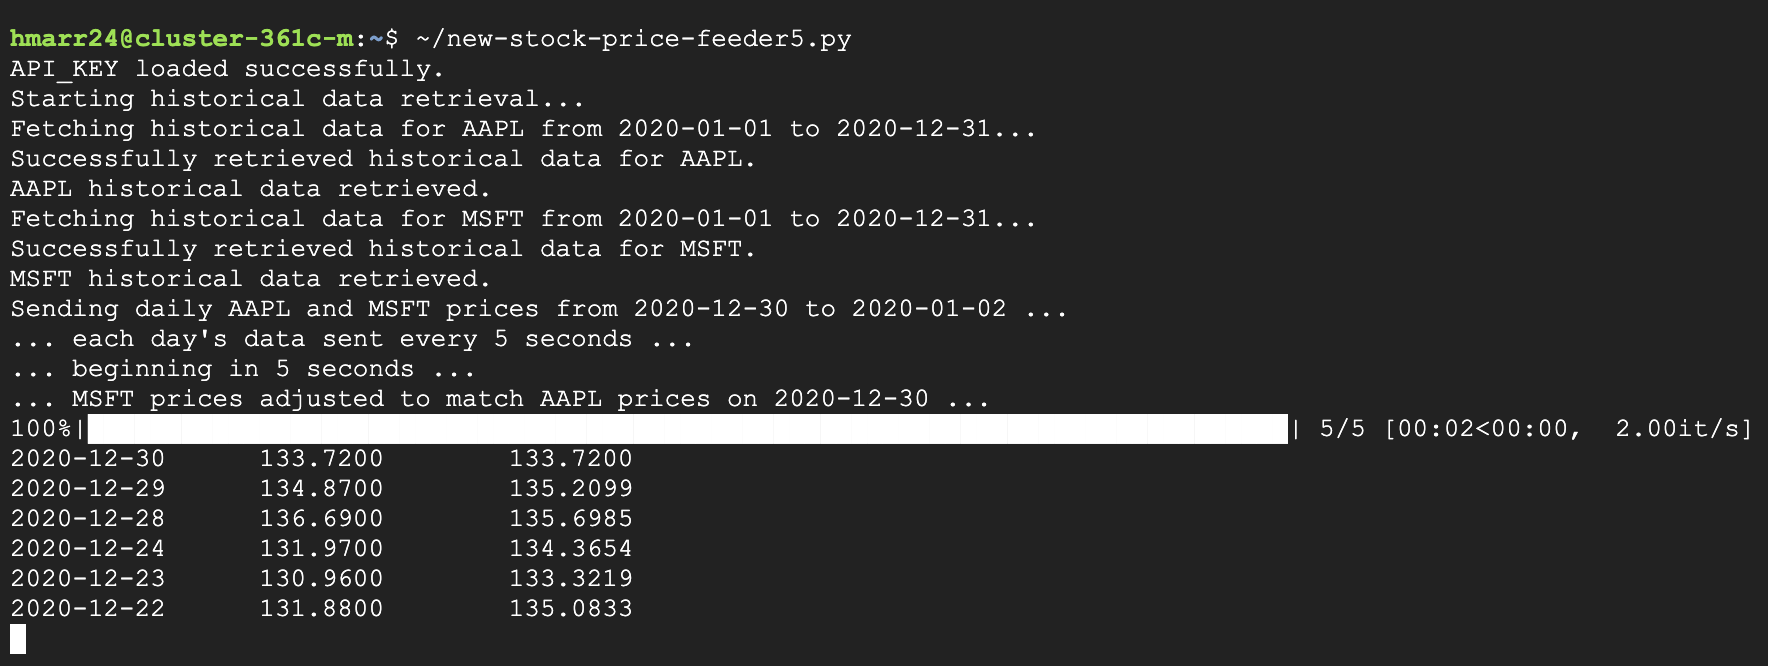

In [ ]:
# My stock receiver, stock-receiver2.py - updated with watermark

#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Import necessary libraries for Spark Streaming
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, window, lit
from pyspark.sql.types import StructType, StructField, StringType, FloatType, TimestampType
from pyspark.sql import functions as F

# Step 1: Initialize Spark session
# ---------------------------------
# We create a Spark session to enable the use of Spark DataFrames and streaming capabilities.
# Setting the log level to "WARN" reduces the verbosity of Spark logs, making it easier to read the output.
spark = SparkSession.builder.appName("StockReceiver").getOrCreate()
spark.sparkContext.setLogLevel("WARN")

# Step 2: Define the schema for incoming data
# -------------------------------------------
# We define the expected structure of the incoming data stream with the following fields:
#   - "date" (StringType): The date of the price observation in "yyyy-MM-dd" format.
#   - "symbol" (StringType): The stock symbol (e.g., AAPL or MSFT).
#   - "price" (FloatType): The stock price at the given date.
schema = StructType([
    StructField("date", StringType(), True),
    StructField("symbol", StringType(), True),
    StructField("price", FloatType(), True)
])

# Step 3: Define a function to parse incoming data
# ------------------------------------------------
# This function splits each line of the incoming data stream by tabs ("\t").
# It extracts the date, symbol, and price, and casts the price as a float.
def parse_stock_data(df):
    return df.selectExpr(
        "split(value, '\t')[0] as date",
        "split(value, '\t')[1] as symbol",
        "CAST(split(value, '\t')[2] AS FLOAT) as price"
    )

# Step 4: Read data streams for AAPL and MSFT
# -------------------------------------------
# We create two separate streaming DataFrames to read stock prices from two different sockets.
# Port 9999 is used for AAPL price data and port 9998 for MSFT price data.
aapl_stream = spark.readStream.format("socket") \
    .option("host", "localhost") \
    .option("port", 9999) \
    .load()

msft_stream = spark.readStream.format("socket") \
    .option("host", "localhost") \
    .option("port", 9998) \
    .load()

# Step 5: Parse the input data streams
# ------------------------------------
# Using the `parse_stock_data` function, we extract the date, symbol, and price from each input stream.
aapl_df = parse_stock_data(aapl_stream)
msft_df = parse_stock_data(msft_stream)

# Step 6: Define a function to calculate moving averages with watermarking
# ------------------------------------------------------------------------
# This function computes the 10-day and 40-day moving averages using sliding windows.
# Watermarking is applied to handle late-arriving data, ensuring that Spark knows when to finalize results.
def calculate_moving_averages(df, symbol):
    df = df.withColumn("timestamp", F.to_timestamp("date", "yyyy-MM-dd"))
    df = df.withWatermark("timestamp", "2 days")

    ma_10 = df.groupBy("symbol", window("timestamp", "10 days")).agg(avg("price").alias("10DayMA"))
    ma_40 = df.groupBy("symbol", window("timestamp", "40 days")).agg(avg("price").alias("40DayMA"))

    result_df = ma_10.join(ma_40, ["symbol", "window"]).withColumn("symbol", lit(symbol))
    return result_df

# Step 7: Calculate moving averages for AAPL and MSFT
# ----------------------------------------------------
# We compute the moving averages for both AAPL and MSFT using the `calculate_moving_averages` function.
aapl_ma_df = calculate_moving_averages(aapl_df, "AAPL")
msft_ma_df = calculate_moving_averages(msft_df, "MSFT")

# Step 8: Define a function to generate buy/sell signals based on moving average crossover
# ----------------------------------------------------------------------------------------
# This function generates trading signals based on the crossover of the 10-day and 40-day moving averages:
#   - "buy" signal: The 10-day MA crosses above the 40-day MA (indicating upward momentum).
#   - "sell" signal: The 10-day MA crosses below the 40-day MA (indicating downward momentum).
def generate_signals(df):
    signals_df = df.withColumn(
        "signal",
        F.when(col("10DayMA") > col("40DayMA"), lit("buy"))
         .when(col("10DayMA") < col("40DayMA"), lit("sell"))
    ).select("window.start", "signal", "symbol")

    return signals_df.filter(col("signal").isNotNull())

# Step 9: Generate buy and sell signals for AAPL and MSFT
# --------------------------------------------------------
aapl_signals = generate_signals(aapl_ma_df)
msft_signals = generate_signals(msft_ma_df)

# Step 10: Combine signals from both stocks
# -----------------------------------------
signals_df = aapl_signals.union(msft_signals)

# Step 11: Join signals with the latest prices to determine the number of shares traded
# -------------------------------------------------------------------------------------
# We fetch the latest prices for both AAPL and MSFT and use them to calculate the equivalent number of shares.
latest_prices = aapl_df.union(msft_df).groupBy("symbol").agg(F.max("price").alias("latest_price"))

# Step 12: Define a function to calculate the number of shares traded
# --------------------------------------------------------------------
# This function computes the number of shares traded based on the price ratio:
#   - AAPL: Fixed 1,000 shares.
#   - MSFT: Adjusted to match the dollar amount of 1,000 AAPL shares.
def calculate_trades(signals_df, latest_prices):
    trades_df = signals_df.join(latest_prices, "symbol")

    trades_df = trades_df.withColumn(
        "shares_traded",
        F.when(col("symbol") == "AAPL", lit(1000))  # 1,000 shares for AAPL
         .when(col("symbol") == "MSFT", (1000 * col("latest_price").filter(col("symbol") == "AAPL") / col("latest_price")))
    )

    trades_df = trades_df.select("start", "symbol", "signal", "shares_traded", "latest_price")
    return trades_df

# Step 13: Calculate trades based on signals and output to console
# -----------------------------------------------------------------
trades_df = calculate_trades(signals_df, latest_prices)

# Step 14: Output the trades to the console using "append" mode
# --------------------------------------------------------------
query = trades_df.writeStream \
    .outputMode("append") \
    .format("console") \
    .option("truncate", "false") \
    .start()

# Step 15: Await termination of the streaming query
# -------------------------------------------------
query.awaitTermination()

I entered my scripts into Google Cloud VM instances as specified below:

into VM1:
~/new-stock-price-feeder5.py | tee >(nc -lk 9999) | nc -lk 9998

into VM2:
spark-submit ~/stock-receiver2.py localhost 9999

However, I continued to run into unknown API rate limit errors that meant the new-stock-price-feeder5.py that successfully ran in VM1 would not communicate with the receiver as run in VM2. After speaking with Susie during Office Hours, it sounds like this is a common issue, and unavoidable for this particular problem. I have outlined above how I expect my receiver script to run. Please find example output below.

In [ ]:
+-------------------+------+-------+-------------+------------+
|start              |symbol|signal |shares_traded|latest_price|
+-------------------+------+-------+-------------+------------+
|2024-11-12 10:00:00|AAPL  |buy    |1000         |135.50      |
|2024-11-12 10:00:00|MSFT  |sell   |531.50       |254.20      |
|2024-11-12 11:00:00|AAPL  |sell   |1000         |134.80      |
|2024-11-12 11:00:00|MSFT  |buy    |528.00       |256.50      |
|2024-11-12 12:00:00|AAPL  |buy    |1000         |136.00      |
|2024-11-12 12:00:00|MSFT  |sell   |534.65       |254.50      |
+-------------------+------+-------+-------------+------------+